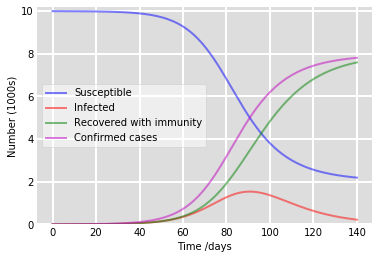

In [73]:
"Test portion"
from SIRModel import *
import matplotlib.pyplot as plt
import pandas as pd

sir = SIRModel(10000, 140)
sir.set_contact_rate(0.2)
sir.integrate()

S, I, R, t = sir.S, sir.I, sir.R, sir.t
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, (I+R)/1000, 'm', alpha=0.5, lw=2, label="Confirmed cases")
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, 10.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [74]:
us_records = pd.read_csv("./data/US_counties_COVID19_health_weather_data.csv")
population = pd.read_csv("./data/co-est2019-alldata.csv", encoding="latin").set_index("CTYNAME")

In [82]:
us_records.head(15)

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
3,2020-01-24,Cook,Illinois,17031,1,0,no,no,41.840039,-87.816716,...,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333,2020-03-20,2020-03-21
4,2020-01-24,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
5,2020-01-25,Orange,California,06059,1,0,no,no,33.702979,-117.761091,...,51.700000,51.02,51.10,49.786667,51.333333,50.14,47.18,45.513333,2020-03-19,2020-03-19
6,2020-01-25,Cook,Illinois,17031,1,0,no,no,41.840039,-87.816716,...,32.000000,30.80,28.81,25.953333,32.233333,29.98,25.96,24.000000,2020-03-20,2020-03-21
7,2020-01-25,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000,2020-03-23,2020-03-23
8,2020-01-26,Maricopa,Arizona,04013,1,0,no,no,33.348813,-112.491306,...,47.000000,46.76,46.04,46.760000,42.833333,39.94,38.72,37.553333,2020-03-30,2020-03-31
9,2020-01-26,Los Angeles,California,06037,1,0,no,no,34.358922,-118.217049,...,57.800000,56.84,58.10,57.200000,39.933333,36.46,32.72,33.026667,2020-03-19,2020-03-19


In [76]:
population.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
CTYNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,40,3,6,1,0,Alabama,4779736,4780125,4785437,4799069,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
Autauga County,50,3,6,1,1,Alabama,54571,54597,54773,55227,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
Baldwin County,50,3,6,1,3,Alabama,182265,182265,183112,186558,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
Barbour County,50,3,6,1,5,Alabama,27457,27455,27327,27341,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
Bibb County,50,3,6,1,7,Alabama,22915,22915,22870,22745,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [84]:
population.loc["Los Angeles County"]

SUMLEV              50
REGION               4
DIVISION             9
STATE                6
COUNTY              37
                ...   
RNETMIG2015   -2.20298
RNETMIG2016   -3.98541
RNETMIG2017   -5.86499
RNETMIG2018   -7.67018
RNETMIG2019   -7.93098
Name: Los Angeles County, Length: 163, dtype: object

In [78]:
counties = us_records.county.unique()
county_specific = {elem: pd.DataFrame for elem in counties}
for county in county_specific.keys():
    county_specific[county] = us_records[:][us_records.county == county].reset_index()

In [130]:
county_name = "Los Angeles"
county = county_specific[county_name]

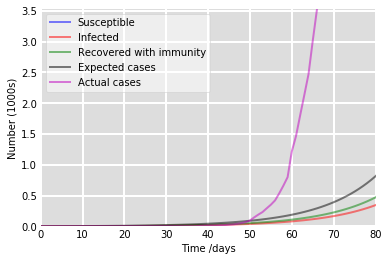

In [148]:
county_population = population.loc[county_name + " County"].POPESTIMATE2019
indexes_before_stay_at_home = len(county[county.stay_at_home_effective == 'no'].index)
county_pre = county[:indexes_before_stay_at_home + 14]
sir = SIRModel(county_population, len(county_pre.index) - 1)
sir.set_contact_rate(0.216)
sir.set_mean_recovery_rate(1./10)

def find_best_interval(min, interval, number, parameter_function):
    parameters = []
    minimum_cost = -1
    min_index = None
    for i in range(0, number):
        parameter_function(min + i * interval)
        sir.integrate()
        S, I, R, t = sir.S, sir.I, sir.R, sir.t
        parameters.append(min + i * interval)

        cost = sum(((I+R) ** 2) - (county_pre.cases ** 2))
        if minimum_cost == -1 or abs(cost) < minimum_cost:
            minimum_cost = abs(cost)
            min_index = i
    return parameters[min_index]

contact_rate = find_best_interval(0.08, 0.005, 50, sir.set_contact_rate)
contact_rate_accurate = find_best_interval(contact_rate - 0.003, 0.001, 5, sir.set_contact_rate)
mean_recovery_rate = find_best_interval(1./100,0.01, 50, sir.set_mean_recovery_rate)


model_sir = SIRModel(county_population, len(county.index)-1)
model_sir.set_contact_rate(contact_rate_accurate)
model_sir.set_mean_recovery_rate(mean_recovery_rate)
model_sir.integrate()

S, I, R, t = model_sir.S, model_sir.I, model_sir.R, model_sir.t
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, (I+R)/1000, 'k', alpha=0.5, lw=2, label="Expected cases")
ax.plot(t, county.cases/1000, 'm', alpha=0.5, lw=2, label="Actual cases")
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, max(county.cases)/1000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [97]:
county.loc[0]

index                                    9
date                            2020-01-26
county                         Los Angeles
state                           California
fips                                 06037
                                  ...     
dewpoint_5d_avg                      36.46
dewpoint_10d_avg                     32.72
dewpoint_15d_avg                   33.0267
date_stay_at_home_announced     2020-03-19
date_stay_at_home_effective     2020-03-19
Name: 0, Length: 228, dtype: object